# Global Financial Crisis of 2007-2008
### An exploratory data analysis through the world's worst economic crisis. 

### Importance and today's relevance. 

The economic crisis of 2007-2008 is considered one of the most serious economic crises of all times since the Great Depression. Historical research and economic analysis point towards the actions of the investors in the early 2000's detonated the economic recession. Investors found that mortgage, which is a type of loan a borrower uses to buy housing, could be highly profitable. Especially, compared to lending money to tech businesses that from time to time appeared unsuccessful and bankrupt. Investing in new businesses, therefore, resulted in a risky and shortly profitable investment. On the other hand, lending mortgage money resulted in a continuous income, and if the loaner was unable to repay the debt, the investors got to keep the house. And usually, after keeping the house, they resold it at a higher price. 

High pricing led to the Bank Investors - which were the ones that bought many houses and then resold them at higher prices - to lose potential buyers, since most citizens were unable to afford such highly priced houses. As a result, Bank Investors started lending mortgage money to almost every citizen that asked for a loan, independently of the risk involved, their ability to repay their debt or credit history. 

The growing inability of citizens to repay the loans and the rapidly increasing interests resulted in very high supply and little demand. Basically, citizen gave up on attempting buying mortgage or were already indebted. The narrowing demand resulted in the house pricing plummeting. In a series of events, investment banks, lenders, and insurance companies went bankrupt and running out of business. Since those institutions were fiancial giants of the economic system, the whole USA entered a period of stagnation. The USA government tried rescuing these institutions by giving them most of the state assets. This resulted in an inability to spend taxation money on other goods and services and drove the country to an economic recession. Although the crisis ended in 2009, the effects of it were still detrimental for a long time. 

During the current Global Pandemic event, similar lending by the government is happening. Because of the lockdown, many corporations had to close, and citizens quit spending in many goods and services. The rescue of businesses is similar to that of the 2008 crisis, and the economic bubble might also collapse, resulting in an unprecedented recession. 
Analysis of these historical and current events provide a means of understanding, preventing and perhaps solving the problem. 


### Top bank institutions from which data will be analysed 

1. Bank of America
2. CitiGroup
3. Goldman Sachs
4. JPMorgan Chase
5. Morgan Stanley
6. Wells Fargo

In [1]:
# Importing relevant libraries for data analysis
from pandas_datareader import data, wb
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Set the times for analysis 
start = datetime.datetime(2006, 1, 1)       # a year before the chaos
end = datetime.datetime(2016, 1, 1)         # a couple of years after the chaos

In [3]:
# 1. Bank of America
BAC = data.DataReader('BAC', 'stooq', start, end)
# 2. CitiGroup
C = data.DataReader('C', 'stooq', start, end)
# 3. Goldman Sachs
GS = data.DataReader('GS', 'stooq', start, end)
# 4. JPMorgan Chase
JPM = data.DataReader('JPM', 'stooq', start, end)
# 5. Morgan Stanley
MS = data.DataReader('MS', 'stooq', start, end)
# 6. Wells Fargo
WFC = data.DataReader('WFC', 'stooq', start, end)

In [4]:
# List of tickers
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [5]:
# Concatenate into a single data frame
stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

stocks.columns.names = ['Bank:', 'Operation:']
stocks.head(1)

Bank:          BAC                                          C                  \
Operation:    Open    High     Low  Close      Volume    Open    High     Low   
Date                                                                            
2006-01-03  40.981  41.205  40.308  41.12  18658143.0  431.01  434.32  423.15   

Bank:                          ...      MS                                    \
Operation:   Close     Volume  ...    Open    High     Low  Close     Volume   
Date                           ...                                             
2006-01-03  433.55  1748134.0  ...  39.536  40.445  39.233  40.32  6454836.0   

Bank:         WFC                                      
Operation:   Open    High     Low   Close      Volume  
Date                                                   
2006-01-03  23.52  23.801  23.223  23.743  14801667.0  

[1 rows x 30 columns]

In [6]:
# Maximum close price of each bank
stocks.xs(key='Close', axis=1, level='Operation:').max()

Bank:
BAC     47.949
C      496.170
GS     211.900
JPM     60.015
MS      61.752
WFC     48.701
dtype: float64

In [7]:
returnsDF = pd.DataFrame()

In [8]:
for tick in tickers:
    returnsDF[tick + ' return'] = stocks[tick]['Close'].pct_change()

In [9]:
returnsDF.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010603,-0.018498,-0.013618,-0.014233,0.000794,-0.011624
2006-01-05,0.001303,0.004912,-0.000368,0.003034,0.002726,-0.000980
2006-01-06,-0.001522,0.000000,0.013903,0.007081,0.000989,0.005630
2006-01-09,0.000664,-0.004677,0.012078,0.016208,0.010469,0.000000


In [10]:
returnsDF.dropna(inplace=True)

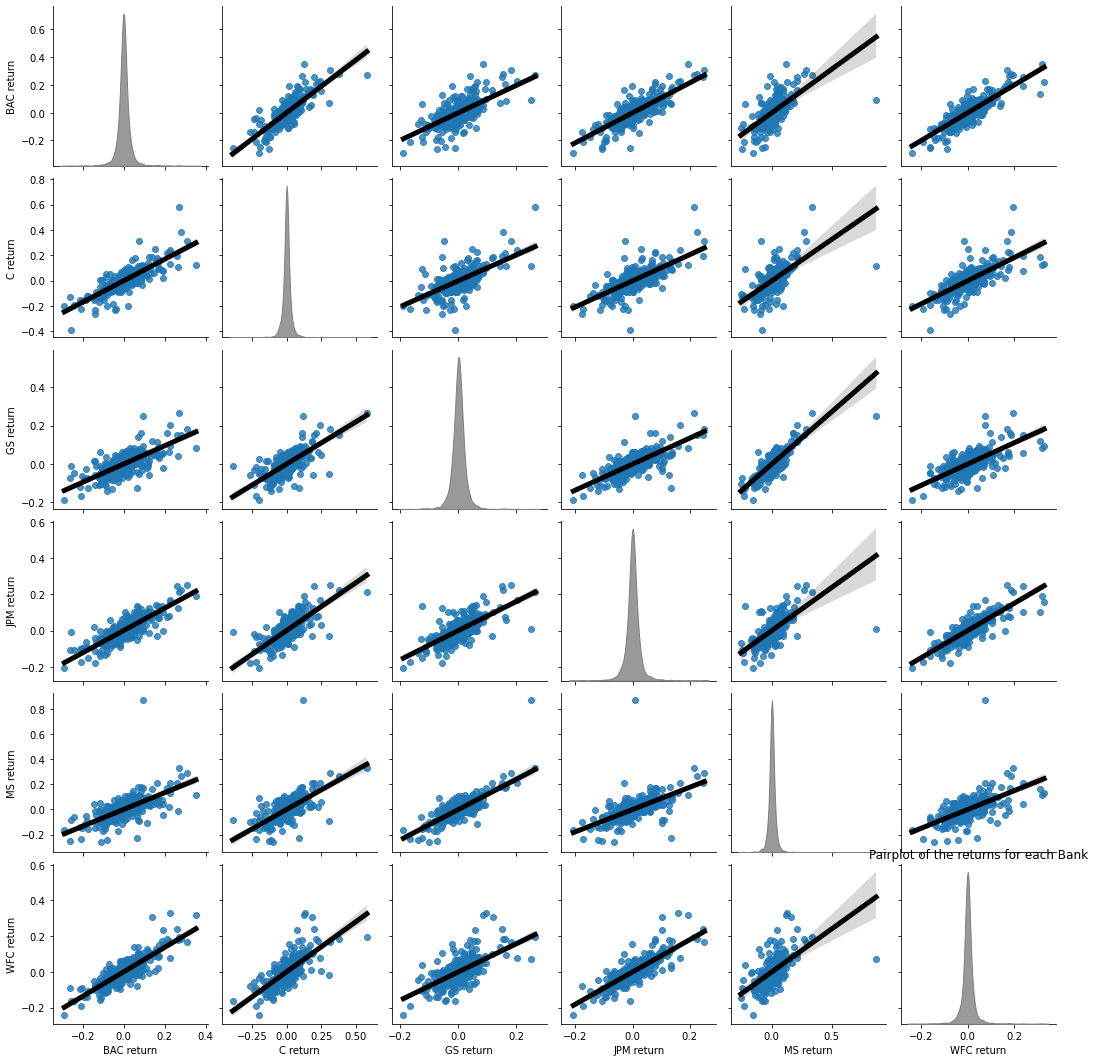

In [11]:
sns.pairplot(data=returnsDF, 
             kind='reg', 
             diag_kws={'color': 'gray', 'alpha': 0.8}, 
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'black', 'lw': 5}})
plt.title('Pairplot of the returns for each Bank')
plt.show()

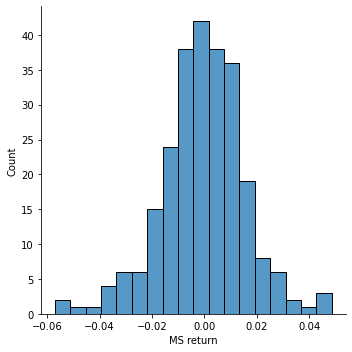

In [12]:
# Distplot for 2015 for MS
sns.displot(returnsDF.loc['2015-01-01':'2015-12-31']['MS return'])
plt.show()

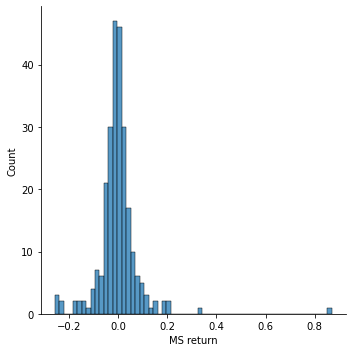

In [13]:
# Distplot for 2006 for MS
sns.displot(returnsDF.loc['2008-01-01':'2008-12-31']['MS return'])
plt.show()

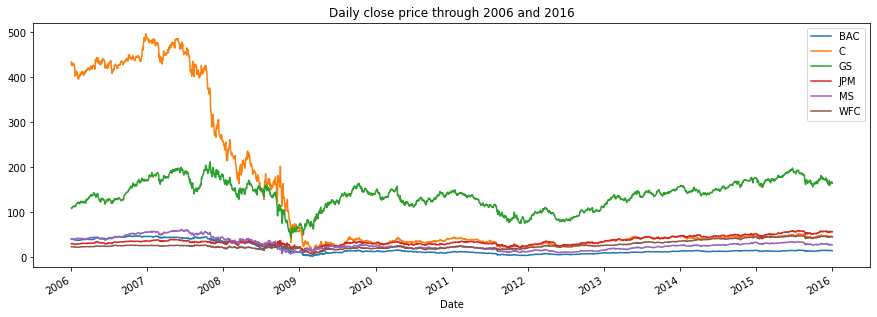

In [14]:
plt.title('Daily close price through 2006 and 2016')

for tick in tickers:
    stocks[tick]['Close'].plot(figsize=(15,5),label=tick)
plt.legend()

plt.show()

In [15]:
# Interactive plot with plotly
import plotly
import cufflinks as cf
cf.go_offline()

stocks.xs(key='Close',axis=1,level='Operation:').iplot()

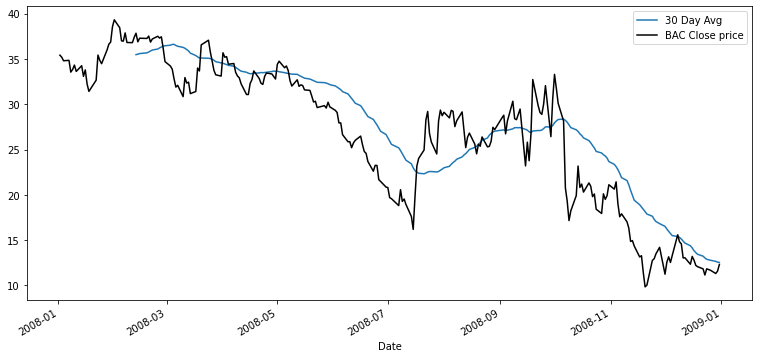

In [16]:
# Moving avarages for BAC
plt.figure(figsize=(13,6))

stocks.BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
stocks.BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close price', color ='black')
plt.legend()

plt.show()

In [17]:
# Correlation plot using plotly
corr = stocks.xs(key='Close',axis=1,level='Operation:').corr()
corr.iplot(kind='heatmap',colorscale='rdbu')

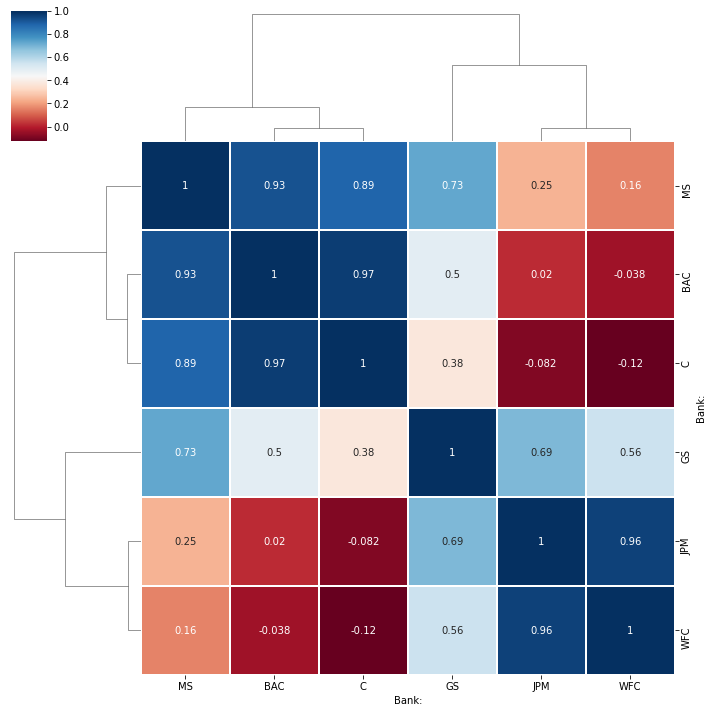

In [18]:
# Cluster heatmap 
sns.clustermap(stocks.xs(key='Close',axis=1,level='Operation:').corr(),
            annot=True, 
            linecolor= 'white', 
            linewidths= 1, 
            cmap= 'RdBu')
plt.show()

In [32]:
# Candle plot for BAC
stocks.BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [34]:
# Simple moving averages for MG
stocks.MS[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

In [35]:
# technical analysis for BAC plot
stocks.BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')